In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train0.shape, y_train0.shape

((60000, 28, 28), (60000,))

In [2]:
import numpy as np
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [3]:
X_train.shape, Y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adadelta, Adam
from keras.regularizers import l2

In [5]:
model1 = Sequential()
model1.add(Conv2D(filters=4, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', kernel_initializer='glorot_uniform'))
model1.add(MaxPool2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

np.random.seed(0)
model1.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [7]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.8570 - acc: 0.7487 - val_loss: 0.3016 - val_acc: 0.9138
Epoch 2/10
 - 12s - loss: 0.2476 - acc: 0.9290 - val_loss: 0.1939 - val_acc: 0.9436
Epoch 3/10
 - 13s - loss: 0.1857 - acc: 0.9465 - val_loss: 0.1575 - val_acc: 0.9546
Epoch 4/10
 - 13s - loss: 0.1567 - acc: 0.9549 - val_loss: 0.1335 - val_acc: 0.9622
Epoch 5/10
 - 13s - loss: 0.1380 - acc: 0.9609 - val_loss: 0.1221 - val_acc: 0.9654
Epoch 6/10
 - 13s - loss: 0.1259 - acc: 0.9640 - val_loss: 0.1129 - val_acc: 0.9677
Epoch 7/10
 - 13s - loss: 0.1158 - acc: 0.9672 - val_loss: 0.1048 - val_acc: 0.9693
Epoch 8/10
 - 13s - loss: 0.1082 - acc: 0.9693 - val_loss: 0.0993 - val_acc: 0.9696
Epoch 9/10
 - 13s - loss: 0.1021 - acc: 0.9709 - val_loss: 0.0967 - val_acc: 0.9716
Epoch 10/10
 - 13s - loss: 0.0970 - acc: 0.9722 - val_loss: 0.0911 - val_acc: 0.9727
CPU times: user 5min 43s, sys: 18.7 s, total: 6min 2s
Wall time: 2min 8s


In [10]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()

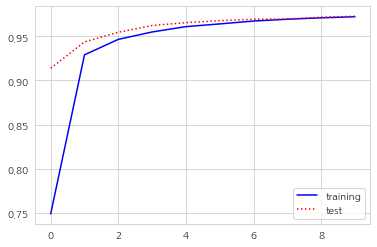

In [11]:
plt.plot(hist1.history['acc'], 'b-', label='training')
plt.plot(hist1.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

test가 성능이 빠르게 수렴된다.

In [15]:
# conv kernel
l1 = model1.layers[0]
w1, b1 = l1.get_weights()
w1.shape, b1.shape

((5, 5, 1, 4), (4,))

conv kernel 사이즈 : 5 x 5 x 1 x 4

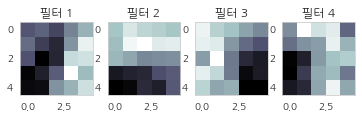

In [17]:
M = 4 # 필터 4개 출력
for i in range(M):
    plt.subplot(1, M, i+1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone)
    plt.title("필터 {}".format(i+1))
    plt.grid(False)

In [18]:
model1.layers # 0 conv2D, 1 MaxPooling, 2 Flatten, 3 Dense

In [30]:
import keras.backend as K

f10 = K.function([model1.input], [model1.layers[0].output]) # input_size None, 28, 28, 1 and Conv2D
f11 = K.function([model1.input], [model1.layers[1].output]) # MaxPooling
f12 = K.function([model1.input], [model1.layers[2].output]) # flatten
f13 = K.function([model1.input], [model1.layers[3].output]) # Dense

In [31]:
model1.input

<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>

In [51]:
def visualize1(n):
    x = X_train[n:n+1]
    plt.figure(figsize=(8, 3))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        if i == 1:
            plt.imshow(x[0, :, :, 0], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.imshow(np.zeros_like(x[0, :, :, 0]), cmap=mpl.cm.bone_r)
            plt.axis('off')
    plt.tight_layout()
    plt.suptitle("입력 이미지", y=1)
    
    z0 = f10([x])[0]  # kernel
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(z0[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("컨벌루션 필터 통과 후", y=1.1)
    
    z1 = f11([x])[0] # MaxPooling layer
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(z1[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 맥스풀링 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("맥스풀링 통과 후", y=1.1)
    
    z2 = f12([x])[0] # Flatten layer 1개
    plt.figure(figsize=(9, 1)) 
    plt.imshow(z2, aspect=10, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("벡터화")
    
    z3 = f13([x])[0] # output : softmax class 10
    plt.figure(figsize=(9, 1))
    plt.imshow(z3, cmap=mpl.cm.bone_r)
    plt.xticks(range(10)); plt.yticks([]); plt.grid(False)
    plt.title("10-클래스 분류 결과")

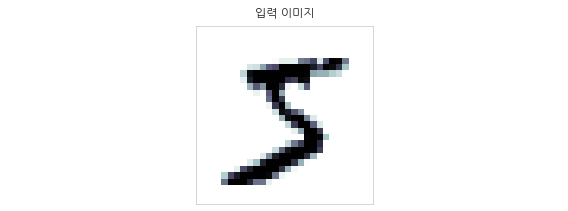

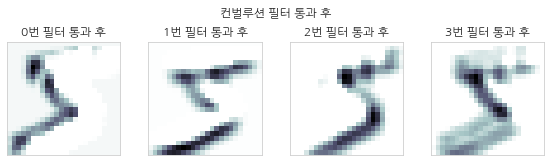

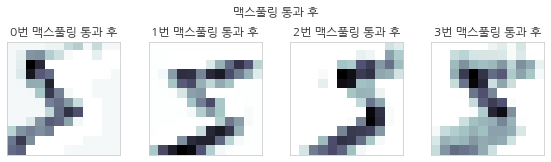

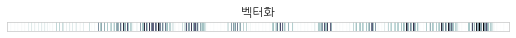

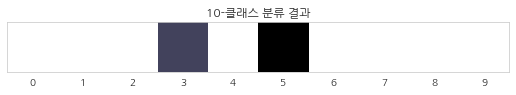

In [52]:
visualize1(0)

In [53]:
y_train0[0]

5

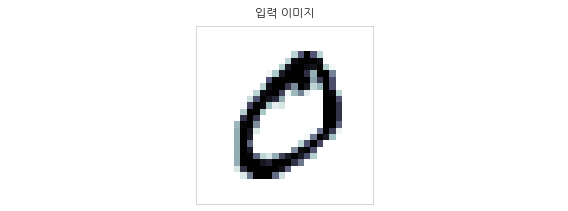

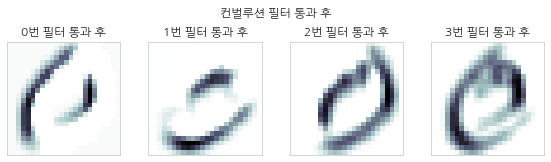

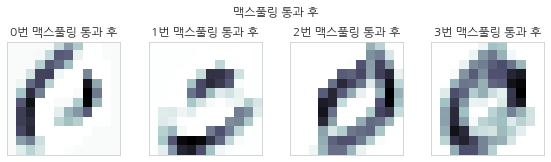

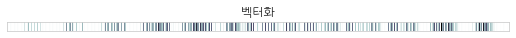

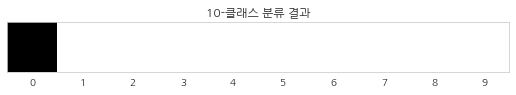

In [54]:
visualize1(1)

In [56]:
y_train0[1]

0

## 2 Convolution Layers

In [57]:
np.random.seed(0)
model2 = Sequential()
model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer='glorot_uniform'))
model2.add(MaxPool2D())
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer='glorot_uniform'))
model2.add(MaxPool2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

In [58]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
____________________________________________________

In [60]:
model2.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

In [61]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 16s - loss: 1.0248 - acc: 0.6604 - val_loss: 0.4348 - val_acc: 0.8598
Epoch 2/20
 - 16s - loss: 0.3465 - acc: 0.8943 - val_loss: 0.2701 - val_acc: 0.9194
Epoch 3/20
 - 16s - loss: 0.2665 - acc: 0.9192 - val_loss: 0.2223 - val_acc: 0.9323
Epoch 4/20
 - 16s - loss: 0.2281 - acc: 0.9312 - val_loss: 0.1973 - val_acc: 0.9400
Epoch 5/20
 - 16s - loss: 0.2018 - acc: 0.9393 - val_loss: 0.1785 - val_acc: 0.9470
Epoch 6/20
 - 15s - loss: 0.1842 - acc: 0.9448 - val_loss: 0.1575 - val_acc: 0.9535
Epoch 7/20
 - 16s - loss: 0.1694 - acc: 0.9491 - val_loss: 0.1481 - val_acc: 0.9564
Epoch 8/20
 - 15s - loss: 0.1583 - acc: 0.9527 - val_loss: 0.1384 - val_acc: 0.9592
Epoch 9/20
 - 15s - loss: 0.1480 - acc: 0.9560 - val_loss: 0.1285 - val_acc: 0.9625
Epoch 10/20
 - 16s - loss: 0.1399 - acc: 0.9581 - val_loss: 0.1252 - val_acc: 0.9627
Epoch 11/20
 - 15s - loss: 0.1338 - acc: 0.9602 - val_loss: 0.1158 - val_acc: 0.9655
Epoch 12/20
 - 15s - los

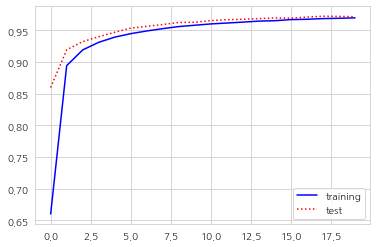

In [62]:
plt.plot(hist2.history['acc'], 'b-', label='training')
plt.plot(hist2.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

In [63]:
# 모델 저장
model2.save('mnist_cnn21.hdf5')

In [64]:
l21 = model2.layers[0]  # cov2D #1
w21, b21 = l21.get_weights()

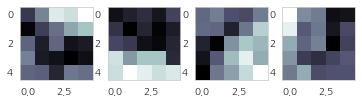

In [68]:
# conv2D 첫번째 커널 4개 출력
M = 4
for i in range(M):
    plt.subplot(1, M, i+1)
    plt.imshow(w21[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [66]:
w21.shape

(5, 5, 1, 4)

In [70]:
l22 = model2.layers[2]  # Conv2D 2번째
w22, b22 = l22.get_weights()

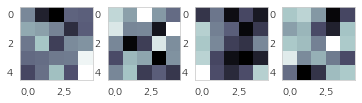

In [71]:
M = 4
for i in range(M):
    plt.subplot(1, M, i+1)
    plt.imshow(w22[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [76]:
import keras.backend as K

f20 = K.function([model2.input], [model2.layers[0].output]) # conv
f21 = K.function([model2.input], [model2.layers[1].output]) # MaxPool
f22 = K.function([model2.input], [model2.layers[2].output]) # conv
f23 = K.function([model2.input], [model2.layers[3].output]) # MaxPool
f24 = K.function([model2.input], [model2.layers[4].output]) # flatten
f25 = K.function([model2.input], [model2.layers[5].output]) # softmax 출력

def visualize2(n):
    x = X_train[n:n+1]
    plt.figure(figsize=(8, 3))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        if i == 1:
            plt.imshow(x[0, :, :, 0], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.imshow(np.zeros_like(x[0, :, :, 0]), cmap=mpl.cm.bone_r)
            plt.axis('off')
    plt.tight_layout()
    plt.suptitle("입력 이미지", y=1.1)
    
    z0 = f20([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(z0[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("1차 컨벌루션 필터 통과 후", y=1.1)
    
    z1 = f21([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(z1[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title('{}번 필터 통과 후'.format(i), y=1.1)
    plt.tight_layout()
    plt.suptitle("1차 맥스풀링 통과 후", y=1.1)
        
    z2 = f22([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(z2[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title('{}번 필터 통과 후'.format(i))
    plt.tight_layout()
    plt.suptitle("2차 컨벌루션 필터 통과 후", y=1.1)
    
    z3 = f23([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(z3[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("2차 맥스풀링 통과 후", y=1.1)
    
    z4 = f24([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z4, aspect=1, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("벡터화")
    
    z5 = f25([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z5, aspect=0.2, cmap=mpl.cm.bone_r)
    plt.xticks(range(10)); plt.yticks([]); plt.grid(False)
    plt.title("10-클래스 분류 결과")

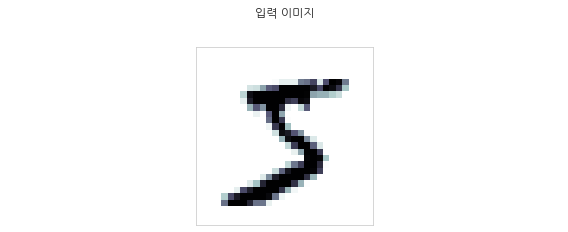

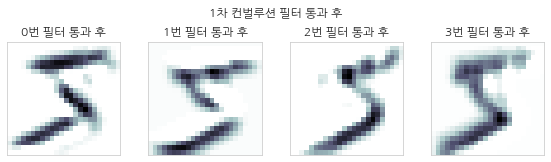

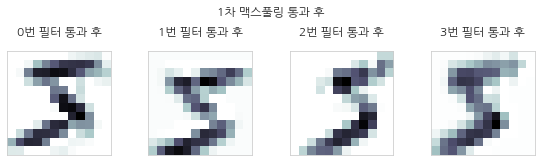

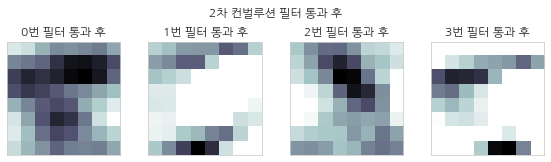

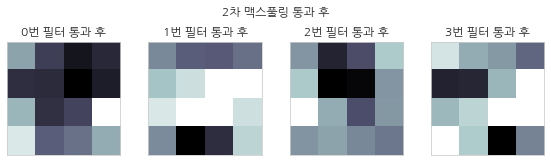

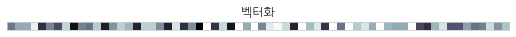

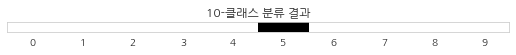

In [77]:
visualize2(0)

In [78]:
y_train0[0]

5